In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
from google.colab import files
uploaded = files.upload()


Saving creditcard.csv to creditcard.csv


In [3]:
import pandas as pd

df = pd.read_csv("creditcard.csv")
df.head()  # Optional: View first few rows


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
# Sample for balance and faster training
df_sample = pd.concat([df[df.Class == 0].sample(5000), df[df.Class == 1]])

X = df_sample.drop(['Class', 'Time'], axis=1)
y = df_sample['Class']

# Scale features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [7]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Load the dataset
df = pd.read_csv("creditcard.csv")

# Sample to balance and reduce size
df_sample = pd.concat([df[df.Class == 0].sample(5000, random_state=42), df[df.Class == 1]])

# Split into features and labels
X = df_sample.drop(['Class', 'Time'], axis=1)
y = df_sample['Class']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)


In [8]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

svm_rbf = SVC(kernel='rbf')
svm_rbf.fit(X_train, y_train)
y_pred_rbf = svm_rbf.predict(X_test)
acc_rbf = accuracy_score(y_test, y_pred_rbf)
print("RBF Kernel Accuracy:", acc_rbf)


RBF Kernel Accuracy: 0.978161965423112


In [9]:
svm_rbf = SVC(kernel='rbf')
svm_rbf.fit(X_train, y_train)
y_pred_rbf = svm_rbf.predict(X_test)
acc_rbf = accuracy_score(y_test, y_pred_rbf)
print("RBF Kernel Accuracy:", acc_rbf)


RBF Kernel Accuracy: 0.978161965423112


In [10]:
svm_poly = SVC(kernel='poly', degree=3)
svm_poly.fit(X_train, y_train)
y_pred_poly = svm_poly.predict(X_test)
acc_poly = accuracy_score(y_test, y_pred_poly)
print("Polynomial Kernel Accuracy:", acc_poly)


Polynomial Kernel Accuracy: 0.9727024567788899


In [12]:
from sklearn.decomposition import PCA

# Apply PCA to reduce dimensions for visualization
pca = PCA(n_components=2)
X_vis = pca.fit_transform(X_scaled)


In [14]:
svm_linear = SVC(kernel='linear')
svm_linear.fit(X_train, y_train)


SVC(kernel='linear')

In [15]:
svm_poly = SVC(kernel='poly', degree=3)
svm_poly.fit(X_train, y_train)


SVC(kernel='poly')

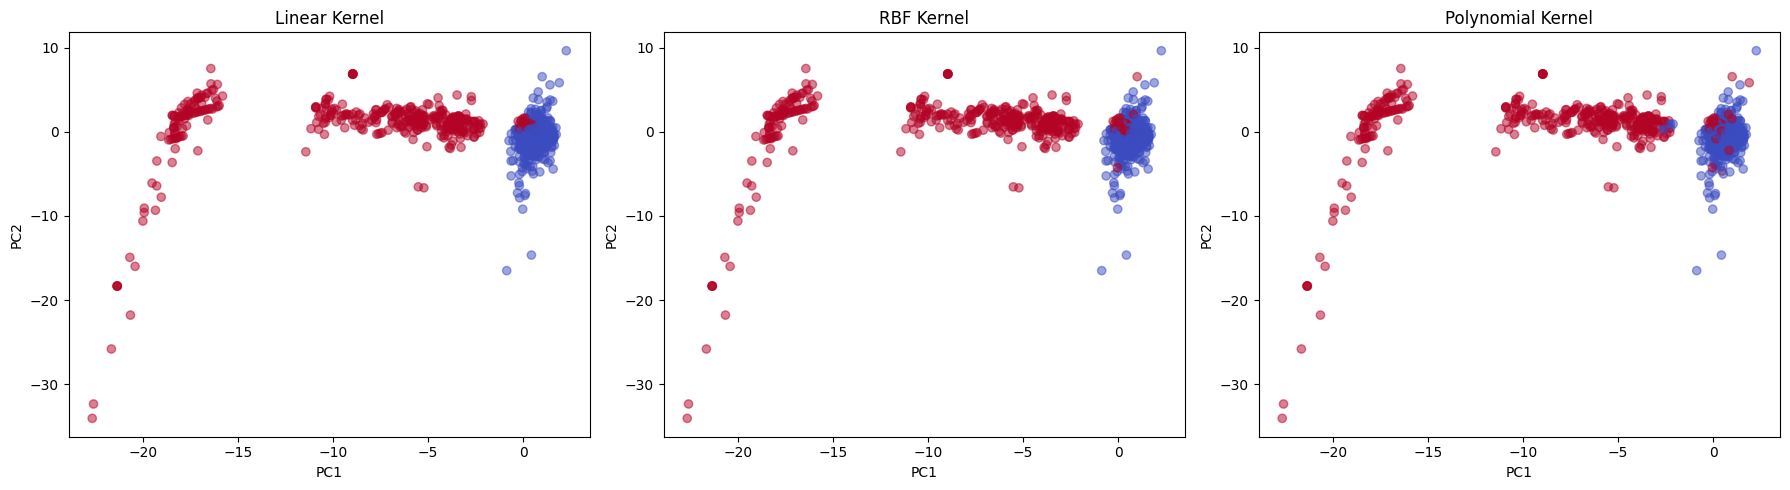

In [16]:
labels_linear = svm_linear.predict(X_scaled)
labels_rbf = svm_rbf.predict(X_scaled)
labels_poly = svm_poly.predict(X_scaled)

# Visualize
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 3, figsize=(18, 5))
titles = ['Linear Kernel', 'RBF Kernel', 'Polynomial Kernel']
labels = [labels_linear, labels_rbf, labels_poly]

for i in range(3):
    axs[i].scatter(X_vis[:, 0], X_vis[:, 1], c=labels[i], cmap='coolwarm', alpha=0.5)
    axs[i].set_title(titles[i])
    axs[i].set_xlabel('PC1')
    axs[i].set_ylabel('PC2')

plt.tight_layout()
plt.show()
